In [107]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import *

from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [92]:
#Modeling
def modeling(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    metrics(y_test,pred)

In [93]:
#Metircs
def metrics(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    balanced = balanced_accuracy_score(y_test,pred)
    roc_score = roc_auc_score(y_test,pred,average='macro')
    print('Accuracy : {0:.2f}, Precision : {1:.2f}, Recall : {2:.2f}'.format(accuracy,precision,recall))
    print('f1-score : {0:.2f}, Balanced Accuracy : {1:.2f}'.format(f1, balanced))

In [109]:
def scaler_splited(train, test):
    scaler = MinMaxScaler()
    scaler.fit(train)
    train_scale = scaler.transform(train)
    test_scale = scaler.transform(test)

    train_scaled_df = pd.DataFrame(train_scale)
    test_scaled_df = pd.DataFrame(test_scale)
    
    return train_scaled_df, test_scaled_df

In [78]:
# #SMOTE
# smote = SMOTE(random_state=0)
# X_train_over,y_train_over = smote.fit(X_train,y_train)
# print('Features for train / label Dataset before SMOTE: ', X_train.shape, y_train.shape)
# print('Features for train / label Dataset after SMOTE: ', X_train_over.shape, y_train_over.shape)
# print('Label value distribution after SMOTE: \n', pd.Series(y_train_over).value_counts())

# DILI

1    54.447439
0    45.552561
Name: DILI, dtype: float64


,DILI,MFPS_1,MFPS_2,MFPS_3,MFPS_4,MFPS_5,MFPS_6,MFPS_7,MFPS_8,MFPS_9,...,TPSA,EState_VSA3,EState_VSA8,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState6,VSA_EState8,FractionCSP3,MolLogP
0,1,0,1,0,0,0,0,0,0,0,...,21.26,0.000000,42.572361,0.000000,3.188329,2.397122,18.560825,3.014781,0.294118,3.72462
1,0,0,0,0,0,1,0,0,0,0,...,12.47,6.041841,55.269521,2.449908,0.751613,1.854830,19.100274,4.115839,0.428571,5.10440
2,1,0,0,0,0,0,0,0,0,0,...,6.48,0.000000,60.293366,4.690135,0.815501,5.433896,15.070834,2.108236,0.368421,4.52840
3,1,0,0,0,0,0,0,0,0,0,...,30.87,5.022633,40.363381,9.688598,4.204200,4.115029,14.156846,4.076558,0.277778,3.72270
4,0,0,0,0,0,0,0,0,0,0,...,55.56,0.000000,23.099011,15.679694,0.000000,10.045208,26.747108,3.614608,0.321429,3.95750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,0,0,0,0,1,1,1,0,0,0,...,118.21,32.351978,46.644294,50.402231,16.230931,2.741398,14.444942,2.555836,0.484848,2.08110
2222,0,0,1,0,0,0,0,0,0,0,...,72.72,12.108208,5.316789,0.000000,30.430310,0.573750,4.261852,0.406960,0.333333,0.35060
2223,0,0,0,0,0,0,0,0,0,0,...,37.30,6.420822,19.075777,10.324075,8.508190,0.000000,0.000000,2.258829,0.833333,6.10850
2224,0,0,0,1,0,1,0,0,0,0,...,67.64,0.000000,9.892314,6.467162,0.000000,10.546288,0.000000,4.153002,0.900000,0.52590


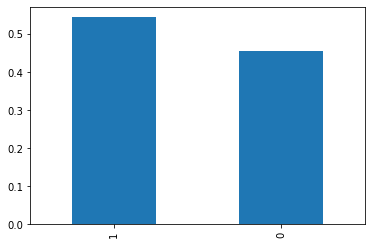

In [144]:
df_raw = pd.read_csv('DILI/final/DILI_GSD.csv') # Need to input Binary class Data
df_raw.DILI.value_counts(normalize=True).plot(kind='bar')
print(df_raw.DILI.value_counts(normalize=True)*100)

df = df_raw.iloc[:, 3:]
df

In [145]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 10)

In [97]:
lr = LogisticRegression()
modeling(lr, X_train, X_test, y_train, y_test)

Accuracy : 0.60, Precision : 0.60, Recall : 0.77
f1-score : 0.68, Balanced Accuracy : 0.58


In [99]:
lgbm = LGBMClassifier()
modeling(lgbm, X_train, X_test, y_train, y_test)

Accuracy : 0.72, Precision : 0.73, Recall : 0.76
f1-score : 0.75, Balanced Accuracy : 0.71


In [100]:
rf = RandomForestClassifier()
modeling(rf,X_train, X_test, y_train, y_test)

Accuracy : 0.73, Precision : 0.74, Recall : 0.78
f1-score : 0.76, Balanced Accuracy : 0.72


In [101]:
knn = KNeighborsClassifier()
modeling(knn,X_train, X_test, y_train, y_test)

Accuracy : 0.65, Precision : 0.67, Recall : 0.70
f1-score : 0.68, Balanced Accuracy : 0.64


In [108]:
svm = SVC()
modeling(svm, X_train, X_test, y_train, y_test)

Accuracy : 0.55, Precision : 0.55, Recall : 0.98
f1-score : 0.70, Balanced Accuracy : 0.51


In [146]:
X_train_scaled , X_test_scaled = scaler_splited(X_train, X_test)

In [112]:
lr = LogisticRegression()
modeling(lr, X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy : 0.68, Precision : 0.71, Recall : 0.69
f1-score : 0.70, Balanced Accuracy : 0.68


In [113]:
lgbm = LGBMClassifier()
modeling(lgbm, X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy : 0.71, Precision : 0.73, Recall : 0.76
f1-score : 0.74, Balanced Accuracy : 0.71


In [114]:
rf = RandomForestClassifier()
modeling(rf,X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy : 0.73, Precision : 0.75, Recall : 0.77
f1-score : 0.76, Balanced Accuracy : 0.73


In [116]:
knn = KNeighborsClassifier()
modeling(knn,X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy : 0.65, Precision : 0.68, Recall : 0.70
f1-score : 0.69, Balanced Accuracy : 0.65


In [117]:
svm = SVC()
modeling(svm, X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy : 0.73, Precision : 0.72, Recall : 0.83
f1-score : 0.77, Balanced Accuracy : 0.72


In [119]:
smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

In [120]:
print('Features for train / label Dataset before SMOTE: ', X_train.shape, y_train.shape)
print('Features for train / label Dataset after SMOTE: ', X_train_over.shape, y_train_over.shape)
print('Label value distribution after SMOTE: \n', pd.Series(y_train_over).value_counts())

Features for train / label Dataset before SMOTE:  (1669, 1060) (1669,)
Features for train / label Dataset after SMOTE:  (1816, 1060) (1816,)
Label value distribution after SMOTE: 
 1    908
0    908
Name: DILI, dtype: int64


In [121]:
lr = LogisticRegression()
modeling(lr,X_train_over,X_test,y_train_over,y_test)

Accuracy : 0.61, Precision : 0.66, Recall : 0.60
f1-score : 0.63, Balanced Accuracy : 0.61


In [123]:
lgbm = LGBMClassifier()
modeling(lgbm, X_train_over, X_test, y_train_over, y_test)

Accuracy : 0.73, Precision : 0.75, Recall : 0.74
f1-score : 0.75, Balanced Accuracy : 0.72


In [124]:
model = RandomForestClassifier()
modeling(model, X_train_over, X_test, y_train_over, y_test)

Accuracy : 0.73, Precision : 0.76, Recall : 0.72
f1-score : 0.74, Balanced Accuracy : 0.73


In [126]:
model = KNeighborsClassifier()
modeling(model, X_train_over, X_test, y_train_over, y_test)

Accuracy : 0.63, Precision : 0.67, Recall : 0.62
f1-score : 0.65, Balanced Accuracy : 0.63


In [128]:
model = SVC()
modeling(model, X_train_over, X_test, y_train_over, y_test)

Accuracy : 0.55, Precision : 0.58, Recall : 0.65
f1-score : 0.61, Balanced Accuracy : 0.55


In [147]:
smote = SMOTE(random_state=0)
X_train_scaled_over,y_train_over = smote.fit_resample(X_train_scaled,y_train)

In [148]:
model = LogisticRegression()
modeling(model, X_train_scaled_over, X_test_scaled, y_train_over, y_test)

Accuracy : 0.69, Precision : 0.73, Recall : 0.67
f1-score : 0.70, Balanced Accuracy : 0.69


In [149]:
model = LGBMClassifier()
modeling(model, X_train_scaled_over, X_test_scaled, y_train_over, y_test)

Accuracy : 0.72, Precision : 0.74, Recall : 0.76
f1-score : 0.75, Balanced Accuracy : 0.72


In [150]:
model = RandomForestClassifier()
modeling(model, X_train_scaled_over, X_test_scaled, y_train_over, y_test)

Accuracy : 0.71, Precision : 0.73, Recall : 0.74
f1-score : 0.74, Balanced Accuracy : 0.71


In [151]:
model = KNeighborsClassifier()
modeling(model, X_train_scaled_over, X_test_scaled, y_train_over, y_test)

Accuracy : 0.58, Precision : 0.67, Recall : 0.45
f1-score : 0.54, Balanced Accuracy : 0.59


In [152]:
model = SVC()
modeling(model, X_train_scaled_over, X_test_scaled, y_train_over, y_test)

Accuracy : 0.72, Precision : 0.74, Recall : 0.76
f1-score : 0.75, Balanced Accuracy : 0.72


In [165]:
for i in range(1,100):
    model = LogisticRegression(C=i*10)
    modeling(model, X_train_scaled, X_test_scaled, y_train, y_test)
    print('\n')

Accuracy : 0.69, Precision : 0.71, Recall : 0.71
f1-score : 0.71, Balanced Accuracy : 0.68


Accuracy : 0.68, Precision : 0.71, Recall : 0.69
f1-score : 0.70, Balanced Accuracy : 0.68


Accuracy : 0.68, Precision : 0.72, Recall : 0.69
f1-score : 0.70, Balanced Accuracy : 0.68


Accuracy : 0.68, Precision : 0.71, Recall : 0.68
f1-score : 0.70, Balanced Accuracy : 0.68


Accuracy : 0.68, Precision : 0.71, Recall : 0.68
f1-score : 0.70, Balanced Accuracy : 0.68


Accuracy : 0.67, Precision : 0.70, Recall : 0.67
f1-score : 0.69, Balanced Accuracy : 0.67


Accuracy : 0.67, Precision : 0.71, Recall : 0.68
f1-score : 0.70, Balanced Accuracy : 0.67


Accuracy : 0.67, Precision : 0.70, Recall : 0.68
f1-score : 0.69, Balanced Accuracy : 0.67


Accuracy : 0.67, Precision : 0.71, Recall : 0.68
f1-score : 0.69, Balanced Accuracy : 0.67


Accuracy : 0.67, Precision : 0.71, Recall : 0.68
f1-score : 0.70, Balanced Accuracy : 0.67


Accuracy : 0.67, Precision : 0.71, Recall : 0.67
f1-score : 0.69, Bala

Accuracy : 0.66, Precision : 0.69, Recall : 0.67
f1-score : 0.68, Balanced Accuracy : 0.66


Accuracy : 0.66, Precision : 0.70, Recall : 0.67
f1-score : 0.69, Balanced Accuracy : 0.66


Accuracy : 0.66, Precision : 0.70, Recall : 0.67
f1-score : 0.68, Balanced Accuracy : 0.66


Accuracy : 0.66, Precision : 0.70, Recall : 0.67
f1-score : 0.68, Balanced Accuracy : 0.66


Accuracy : 0.66, Precision : 0.70, Recall : 0.67
f1-score : 0.68, Balanced Accuracy : 0.66


Accuracy : 0.66, Precision : 0.69, Recall : 0.67
f1-score : 0.68, Balanced Accuracy : 0.66


Accuracy : 0.66, Precision : 0.70, Recall : 0.67
f1-score : 0.69, Balanced Accuracy : 0.66


Accuracy : 0.66, Precision : 0.70, Recall : 0.67
f1-score : 0.69, Balanced Accuracy : 0.66


Accuracy : 0.66, Precision : 0.70, Recall : 0.67
f1-score : 0.69, Balanced Accuracy : 0.66


Accuracy : 0.66, Precision : 0.70, Recall : 0.67
f1-score : 0.68, Balanced Accuracy : 0.66


